In [1]:
# Importing DataScience libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV, ElasticNetCV, LassoCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [3]:
# Reading csv file and making'Id' as Index
df_train = pd.read_csv('train.csv',index_col = 'Id')
df_test = pd.read_csv('test.csv',index_col = 'Id')

In [4]:
# Let's look at the top few rows
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# The rows and columns of our dataset 
df_train.shape

(1460, 80)

In [6]:
# Well we have to deal with plenty of attributes 
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# Datatype of each attribute
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [9]:
# Descriptive Statistics of Numerical Variables
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


AttributeError: 'function' object has no attribute 'sum'

In [10]:
# Statistics of our Categorical variables
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
# Checking for the Missing values
# Using isnull fuction to count the total null values in each field
total = df_train.isnull().sum().sort_values(ascending=False) 
# Percent of missing values is estimated by dividing total missing and the original total
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# Concatenating the Total and Percent fields sing pandas concat fucntion
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Displays top 20 from our max sorted list
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [13]:
 #Pandas fillna method to fill missing values with None
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'):
    df_train[col] = df_train[col].fillna('None')

In [14]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [15]:
# For loop to replace the missing data in the 4 attributes to None 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [16]:
# Filling 0 for GarageYrBlt since it depicts No Garage for missing values
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [17]:
# Filling with None since missing values means there is no Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

In [18]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [19]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

In [20]:
# Imputing the most occuring field for Electrical since mostly all houses have Electricity
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [21]:
# Well! Things look better now! 
df_train.isnull().sum().max()

0

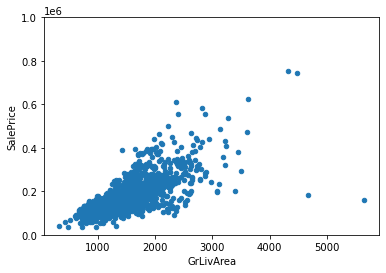

In [22]:
# OUTLIER ANALYSIS
#Scatterplot of Area(sq ft) and SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# set ylimit to limit our data
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

In [23]:
#Sorted descending to pick the values of GrLivArea for them to drop it
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 5642].index)
df_train = df_train.drop(df_train[df_train['GrLivArea'] == 4676].index)

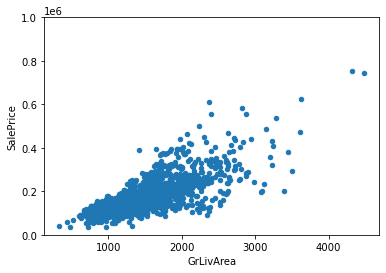

In [24]:
# Rechecking the plot after outlier elimination
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000));

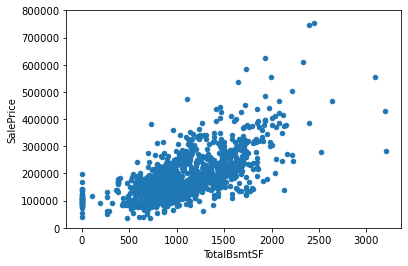

In [25]:
# Total sq feet of Basement area and SalePrice comparison
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


C:\Users\mrpam\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


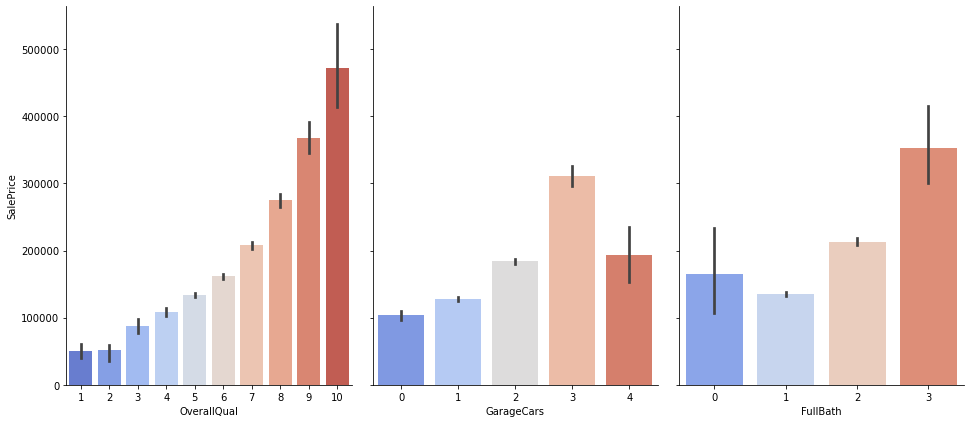

In [26]:
# Let's pick few features of our interest and apply them in a ParGrid to see what's going on! Well, 
# SalesPrice has a strong positive relationship with the **OverallQual**,**GarageCars**,**FullBath**,**SalePrice** though 
# there are some differences in space for Garage cars as the SalePrice goes down after 3 garages, that's interesting
#Let's look at some more variables which affect/influence the Target variable
g = sns.PairGrid(df_train,
                 x_vars=['OverallQual','GarageCars','FullBath'],
                 y_vars=["SalePrice"],
                 aspect=.75, size=6)
#plt.xticks(rotation=90)
g.map(sns.barplot, palette="coolwarm");

C:\Users\mrpam\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


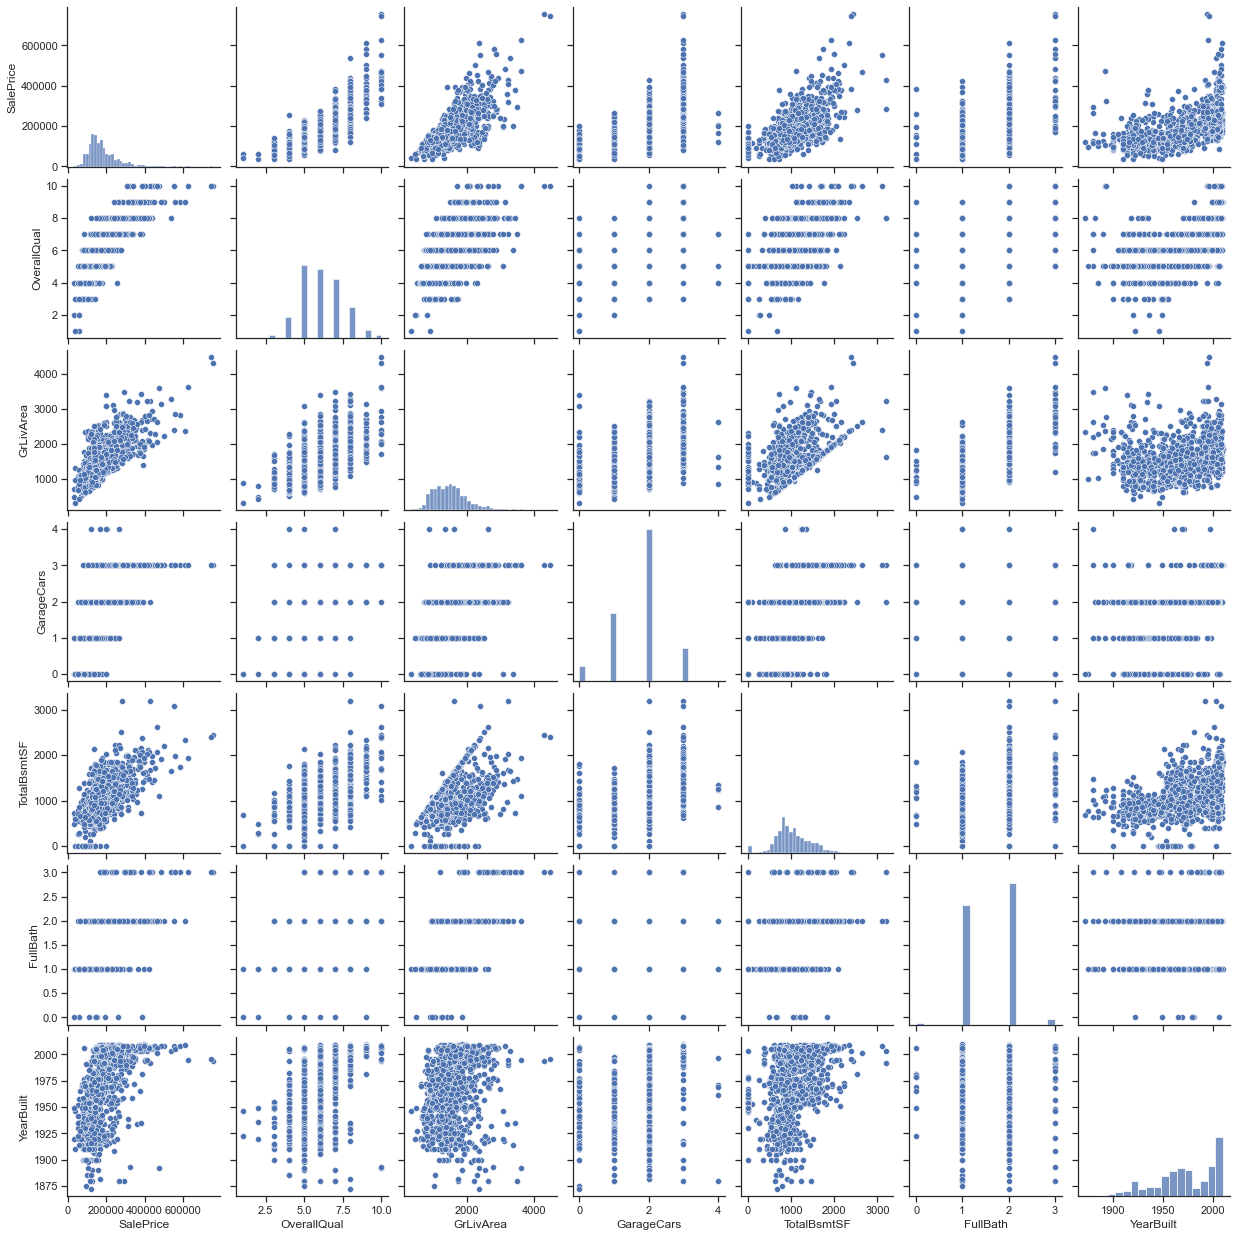

In [27]:
# **Pairplot** from Seaborn is a cool visualization to use since 
# it brings all our important features of consideration in a single plot, 
# below we can see very nice positive correlations between Sales Price, 
# Living Area, TotalBsmtSF and YearBuilt
# seaborn pairplot
sns.set(style= 'ticks')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

C:\Users\mrpam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


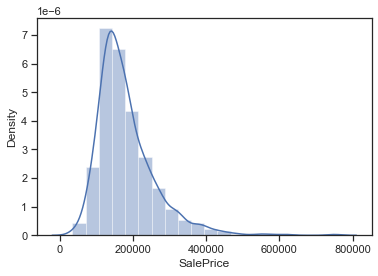

In [29]:
# OUR TARGET : SALEPRICE


# Using Seaborn to create a distplot with 20 bins
sns.distplot(df_train['SalePrice'],bins = 20);

C:\Users\mrpam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



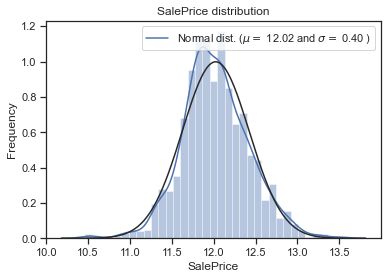

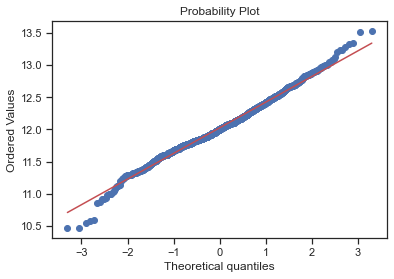

In [30]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

C:\Users\mrpam\AppData\Local\Temp\ipykernel_21348\3272810900.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


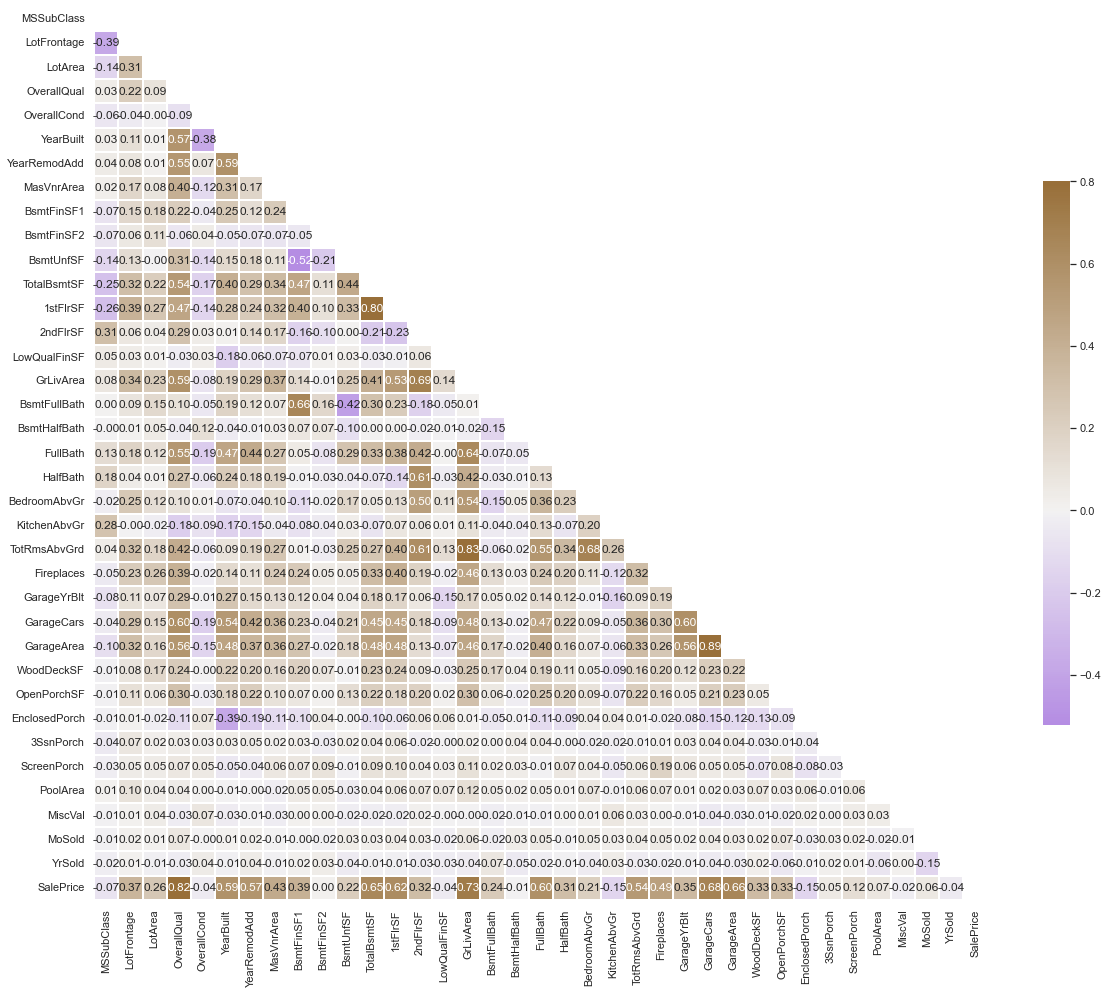

In [31]:
# CORRELATION & HEATMAP

sns.set(style="white")
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask,vmax =.8, cmap=cmap, center=0,fmt= '.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});

In [32]:
# FEATURE ENGINEERING


# Using datatype to seperate numerical features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Computing skewness using lambda function
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna()))
# Filtering highly skewed features
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [33]:
#Log transform to normalize skewed features
df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

In [34]:
#gettting dummies value of categorial 
# pandas get_dummies function to convert categorical values into binary
df_train = pd.get_dummies(df_train)

In [36]:
#**Formulating *X* and *y* arrays**
# X array - drop target
X= df_train.drop(['SalePrice'],axis=1).values


In [37]:
# y array - target only
y=df_train['SalePrice'].values

In [38]:
# Split Train into Train and Validate Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=42)

In [39]:
# Size of our newly split datasets 
print('Train size: %i' % X_train.shape[0])
print('Validation size: %i' % X_val.shape[0])

Train size: 1166
Validation size: 292


In [40]:
# No. of folds for Cross Validation
n_folds = 5
# Defining a function which returns the mean squared error between the cross validation score of X and y arrays
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model,X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [41]:
# Intialize the Cross Validation function with Shuffle
n_folds = 5
custom_cv = KFold(n_folds, shuffle=True, random_state=42)

In [42]:
#PREDICITIVE MODELS

#define  our  GB model
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [43]:
#fitting he model on the train set
GBR.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [44]:
#Cross Validation Error
rmse_cv(GBR).mean()

0.11649138504816628

In [45]:
# R squared, RMSE and Mean Absolute Error obtained by using actual and predicted values from Validate set
print('Validation R^2: %.5f'  % r2_score(y_val,GBR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,GBR.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,GBR.predict(X_val)))

Validation R^2: 0.91069
Validation RMSE: 0.01506

Validation Mean Absolute Error: 0.08167



In [46]:
# Ridge regression with built-in cross-validation.
# ridgecv model
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0],cv =custom_cv)

In [47]:
#fitting our model on the training data
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=KFold(n_splits=5, random_state=42, shuffle=True))

In [48]:
 #let's call our function to calculate the mean cross validation error
rmse_cv(ridgecv).mean()

0.11279364184220324

In [49]:
# R- squared, RMSE and Mean Absolute Error for the validation sets
print('Validation R^2: %.5f'  % r2_score(y_val,ridgecv.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,ridgecv.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,ridgecv.predict(X_val)))

Validation R^2: 0.91508
Validation RMSE: 0.01431

Validation Mean Absolute Error: 0.08349



In [50]:
# kernel model
KRR = KernelRidge(alpha=5)

In [51]:
# fitting on train
KRR.fit(X_train,y_train)

KernelRidge(alpha=5)

In [52]:
#  model estimatores
print('Validation R^2: %.5f'  % r2_score(y_val,KRR.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,KRR.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,KRR.predict(X_val)))

Validation R^2: 0.91660
Validation RMSE: 0.01406

Validation Mean Absolute Error: 0.08308



In [53]:
# CV error
rmse_cv(KRR).mean()

0.11253137444285936

In [54]:
# define the model with alpha values in a numpy array with cross-validation function included
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],cv =custom_cv)

In [56]:
def predict(self, X):
# Model scoring
print('Validation R^2: %.5f'  % r2_score(y_val,lasso.predict(X_val)))
print('Validation RMSE: %.5f\n'   % mean_squared_error(y_val,lasso.predict(X_val)))
print('Validation Mean Absolute Error: %.5f\n'   % mean_absolute_error(y_val,lasso.predict(X_val)))

NotFittedError: This LassoCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.